In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
cd /gdrive/My\ Drive/

/gdrive/My Drive


In [0]:
import pandas as pd
import numpy as np
import pylab as plt
import pandas as pd
from glob import glob
from astropy.io import fits
from astropy.table import Table
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv1D, MaxPooling1D, Flatten , BatchNormalization , ReLU , AveragePooling1D
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras as K

Using TensorFlow backend.


In [0]:
def conf_plotter(y_true, y_pred, classes,
                      normalize=0,
                      title=None,
                      cmap=plt.cm.pink_r,
                      mode = 'train',
                      save = 0,
                      name = 'conf.jpg'):

    if not title:
        if mode == 'train':
            title = 'Normalized confusion matrix on train dataset'
        else:
            title = 'Normalized confusion matrix on test dataset'
            

    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax ,fraction=0.046, pad=0.04)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           xlabel='Predicted label',
           ylabel='True label')
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
                    
        item.set_fontsize(20)
     
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        
        item.set_fontsize(12)

        
                
    plt.gca().invert_yaxis()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if save == 1:
        plt.savefig(name)
    return ax

In [0]:
X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
y_test= pd.read_csv('./data/y_test.csv')

In [0]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((5886, 369), (1962, 369), (5886, 2), (1962, 2))

In [0]:
y_train = y_train.drop(columns =['Unnamed: 0'] )
y_test  = y_test.drop(columns =['Unnamed: 0'] )
X_train = X_train.drop(columns =['Unnamed: 0'] )
X_test = X_test.drop(columns =['Unnamed: 0'] )

In [0]:
# data = pd.read_csv('./Full_Features_train.csv')

In [0]:
df = pd.DataFrame(data)
df.head()


NameError: ignored

In [0]:
df = df.fillna(df.mean())

In [0]:
np.any(np.isnan(df))

False

In [0]:
np.all(np.isfinite(df))

False

In [0]:
df = df.replace(np.inf , np.nan).fillna()
#df.replace([np.inf, -np.inf], np.nan).fillna(df.mean(),axis=1)

In [0]:
#df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [0]:
X = df.drop(['Unnamed: 0' , 'target'] , axis=1)
y = df['target']

In [0]:
from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [0]:
print(X_train.shape , y_train.shape)

(6278, 363) (6278,)


In [0]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

X_train = standardscaler.fit_transform(X_train)

X_test = standardscaler.fit_transform(X_test)

X_train.shape , X_test.shape

((5886, 368), (1962, 368))

In [0]:
from sklearn.preprocessing import OneHotEncoder

y_train = OneHotEncoder(categories='auto').fit_transform(pd.DataFrame(y_train)).toarray()

y_test  = OneHotEncoder(categories='auto').fit_transform(pd.DataFrame(y_test)).toarray()

y_train.shape , y_test.shape

((5886, 14), (1962, 14))

In [0]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)

5

In [0]:
for train_index, test_index in kf.split(X_train):
    
    print(train_index, test_index)

    x_train, x_val = X_train[train_index], X_train[test_index]
    y_tr , y_val = y_train[train_index], y_train[test_index]

[1256 1257 1258 ... 6275 6276 6277] [   0    1    2 ... 1253 1254 1255]
[   0    1    2 ... 6275 6276 6277] [1256 1257 1258 ... 2509 2510 2511]
[   0    1    2 ... 6275 6276 6277] [2512 2513 2514 ... 3765 3766 3767]
[   0    1    2 ... 6275 6276 6277] [3768 3769 3770 ... 5020 5021 5022]
[   0    1    2 ... 5020 5021 5022] [5023 5024 5025 ... 6275 6276 6277]


In [0]:
x_train.shape , x_val.shape , y_tr.shape , y_val.shape

((5023, 364), (1255, 364), (5023, 14), (1255, 14))

In [0]:
len(y_val)

1255

In [0]:
x_train.shape

(5023, 364)

In [0]:
input_dim = X_train.shape[1]

# n_class = len(df['target'].unique())
n_class = 14
input_dim

368

In [0]:
af = tf.nn.selu

K.backend.clear_session()

model = Sequential()

# model.add(Dense(input_dim, input_dim=input_dim))
# model.add(BatchNormalization(trainable=True))
# model.add(Activation(af))
# model.add(Dropout(rate = 0.5))

model.add(Dense(256, input_dim=input_dim))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
model.add(Dropout(rate = 0.5))

model.add(Dense(128))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
model.add(Dropout(rate = 0.5))

model.add(Dense(64))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
model.add(Dropout(rate = 0.5))


model.add(Dense(32))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
model.add(Dropout(rate = 0.5))


model.add(Dense(16))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))


model.add(Dense(n_class, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               94464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
activation_2 (Activation)    (None, 128)              

In [0]:
def multi_weighted_logloss(y_true, y_preds):
    """
    @author olivier https://www.kaggle.com/ogrellier
    multi logloss for PLAsTiCC challenge
    """
    classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
    class_weight = {6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1}
    
    
    y_p = y_preds
    y_ohe = y_true
    
    #y_ohe = pd.get_dummies(y_true)
    # Normalize rows and limit y_preds to 1e-15, 1-1e-15
    y_p = tf.clip_by_value(t=y_p, clip_value_min= 1e-15, clip_value_max=1-1e-15)
    # Transform to log
    y_p_log = tf.log(y_p)

    y_log_ones = tf.reduce_sum(tf.math.multiply(y_ohe , y_p_log), axis=0)

    # Get the number of positives for each class
    nb_pos = tf.reduce_sum( y_ohe ,axis=0)

    # Weight average and divide by the number of positives
    class_arr = np.array([class_weight[k] for k in sorted(class_weight.keys())])
    class_arr = tf.cast(class_arr, tf.float32)

    y_w = y_log_ones * class_arr / nb_pos

    
    loss = - tf.divide(tf.reduce_sum(y_w) , (tf.reduce_sum(class_arr)+1e-30))

    return loss

In [0]:
# def score(yTrue,yPred):
#     return multi_weighted_logloss(yTrue,yPred)

# adam = K.optimizers.Adam(lr=0.01,  epsilon=None, decay=1e-3, amsgrad=False)

In [0]:
def mywloss(y_true,y_pred):
    
     wtable = np.array([1,  2, 1, 1, 1, 1, 1, 2, 1, 1, 1,  1,  1,  1])
#     wtable = np.array([0.02000132, 0.12239221, 0.00397377, 0.12994238, 0.03165773,
#                         0.03278363, 0.15802372, 0.02424002, 0.06411021, 0.00675541,
#                         0.02755149, 0.04900987, 0.3063779 , 0.02318034])
    
    yc=tf.clip_by_value(y_pred,1e-15,1-1e-15)
    loss=-(tf.reduce_mean(tf.reduce_mean(y_true*tf.log(yc),axis=0)/wtable))
    return loss


In [0]:
adam = K.optimizers.Adam(lr=0.00001, decay=1e-3, amsgrad=False)

model.compile(loss = K.losses.categorical_crossentropy , optimizer=adam , metrics=['accuracy'])

In [0]:
# model.compile(loss = K.losses.categorical_crossentropy, optimizer=adam ,metrics=['accuracy'])

In [0]:
model.fit(X_train,y_train, validation_split =0.2  , epochs=10,batch_size=256,verbose=1)

Train on 4708 samples, validate on 1178 samples
Epoch 1/10
4708/4708 [==============================] - 0s 72us/step - loss: 1.0970 - acc: 0.6655 - val_loss: 0.8335 - val_acc: 0.7258
Epoch 2/10
4708/4708 [==============================] - 0s 72us/step - loss: 1.0574 - acc: 0.6854 - val_loss: 0.8155 - val_acc: 0.7334
Epoch 3/10
4708/4708 [==============================] - 0s 71us/step - loss: 1.0359 - acc: 0.6880 - val_loss: 0.7891 - val_acc: 0.7462
Epoch 4/10
4708/4708 [==============================] - 0s 75us/step - loss: 1.0053 - acc: 0.6952 - val_loss: 0.7766 - val_acc: 0.7504
Epoch 5/10
4708/4708 [==============================] - 0s 83us/step - loss: 0.9735 - acc: 0.7075 - val_loss: 0.7521 - val_acc: 0.7555
Epoch 6/10
4708/4708 [==============================] - 0s 72us/step - loss: 0.9573 - acc: 0.7075 - val_loss: 0.7388 - val_acc: 0.7657
Epoch 7/10
4708/4708 [==============================] - 0s 71us/step - loss: 0.9299 - acc: 0.7194 - val_loss: 0.7199 - val_acc: 0.7759
Epoch 8

In [0]:
model.fit(X_train,y_train, validation_split =0.2  , epochs=10,batch_size=200,verbose=1)

Train on 4708 samples, validate on 1178 samples
Epoch 1/10
4708/4708 [==============================] - 0s 101us/step - loss: 0.8547 - acc: 0.7396 - val_loss: 0.6530 - val_acc: 0.7929
Epoch 2/10
4708/4708 [==============================] - 0s 99us/step - loss: 0.8403 - acc: 0.7398 - val_loss: 0.6394 - val_acc: 0.7988
Epoch 3/10
4708/4708 [==============================] - 0s 93us/step - loss: 0.8227 - acc: 0.7453 - val_loss: 0.6215 - val_acc: 0.7954
Epoch 4/10
4708/4708 [==============================] - 0s 103us/step - loss: 0.8096 - acc: 0.7562 - val_loss: 0.6145 - val_acc: 0.8014
Epoch 5/10
4708/4708 [==============================] - 0s 95us/step - loss: 0.7793 - acc: 0.7608 - val_loss: 0.6012 - val_acc: 0.8039
Epoch 6/10
4708/4708 [==============================] - 0s 101us/step - loss: 0.7685 - acc: 0.7649 - val_loss: 0.5854 - val_acc: 0.8073
Epoch 7/10
4708/4708 [==============================] - 0s 96us/step - loss: 0.7570 - acc: 0.7638 - val_loss: 0.5745 - val_acc: 0.8081
Epoc

In [0]:
model.fit(X_train,y_train, validation_split =0.2 , epochs=20 ,batch_size=256,verbose=1)

Train on 4708 samples, validate on 1178 samples
Epoch 1/20
4608/4708 [============================>.] - ETA: 0s - loss: 0.4656 - acc: 0.8503

In [0]:
# evaluate the model
model.evaluate(X_test, y_test)

1962/1962 [==============================] - 0s 93us/step


[0.4719531853872216, 0.8338430172684967]

In [0]:
model.fit(X_train,y_train,epochs=100,batch_size=300,verbose=0)

In [0]:
# evaluate the model
model.evaluate(X_test, y_test, verbose=1)

1570/1570 [==============================] - 0s 92us/step


[0.4915343209057097, 0.8426751592356688]

In [0]:
model.evaluate(X_train, y_train, verbose=1)

6278/6278 [==============================] - 1s 89us/step


[0.419675517432076, 0.8631729850270787]

In [0]:
loaded_model.fit(X_train,y_train,epochs=10,batch_size=300,verbose=0)

NameError: ignored

In [0]:
path = './NN_models/6'
# serialize model to JSON
model_json = model.to_json()
with open(str(path)+'/NN6_model.json', "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights(str(path)+'/NN6_model.h5')
print("Saved model to disk")

Saved model to disk


In [0]:
from keras.models import model_from_json

# load json and create model
json_file = open('./NN_models/5/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./NN_models/5/model.h5")
print("Loaded model from disk")

# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

W0818 09:56:13.573389 140153045301120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3217: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Loaded model from disk


In [0]:
predicts = model.predict(X_test)

y_preds = pd.DataFrame(predicts)
y_true = pd.DataFrame(y_test)


def multi_weighted_logloss(y_true, y_preds):
    """
    @author olivier https://www.kaggle.com/ogrellier
    multi logloss for PLAsTiCC challenge
    """
    classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
    class_weight = {6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1}
    
    
    y_p = y_preds
    y_ohe = y_true
    
    #y_ohe = pd.get_dummies(y_true)
    # Normalize rows and limit y_preds to 1e-15, 1-1e-15
    y_p = np.clip(a=y_p, a_min=1e-15, a_max=1-1e-15)
    # Transform to log
    y_p_log = np.log(y_p)

    
    y_log_ones = np.sum(y_ohe.values * y_p_log, axis=0)
    # Get the number of positives for each class
    nb_pos = y_ohe.sum(axis=0).values.astype(float)
    # Weight average and divide by the number of positives
    class_arr = np.array([class_weight[k] for k in sorted(class_weight.keys())])
    y_w = y_log_ones * class_arr / nb_pos
    
    loss = - np.sum(y_w) / np.sum(class_arr)
    return loss



multi_weighted_logloss(y_true, y_preds)

0.7663681004538777

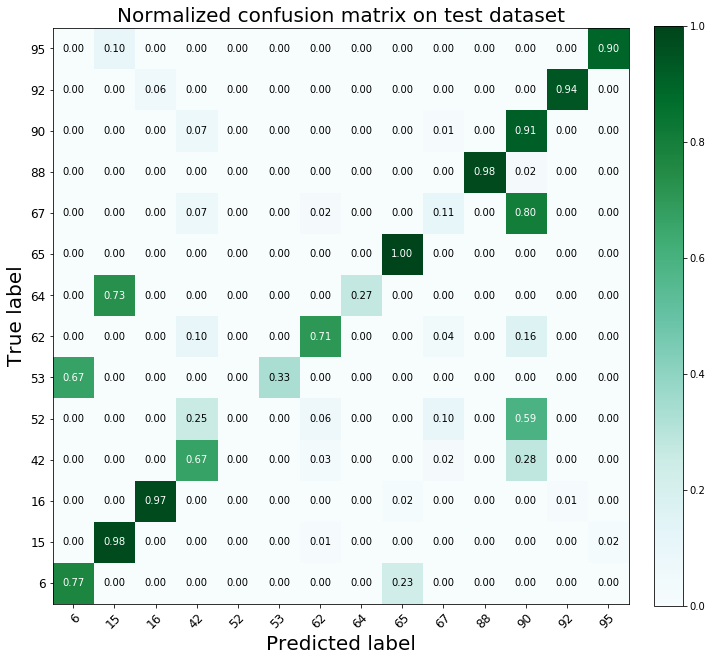

In [0]:
pred = np.array(predicts)
y_t = np.array(y_test)

Y = []
pr= []

for i in range(len(y_test)):
    
    pr.append(np.argmax(pred[i]))
    
    Y.append(np.argmax((y_t[i])))

classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]

labels = [classes[i] for i in range(len(classes))]
conf_plotter(Y , pr , labels , normalize=1, mode='test' , cmap = plt.cm.BuGn, save=1 , name='NN.jpg')

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y, pr)
np.trace(cm)/len(y_test)

0.9127388535031847

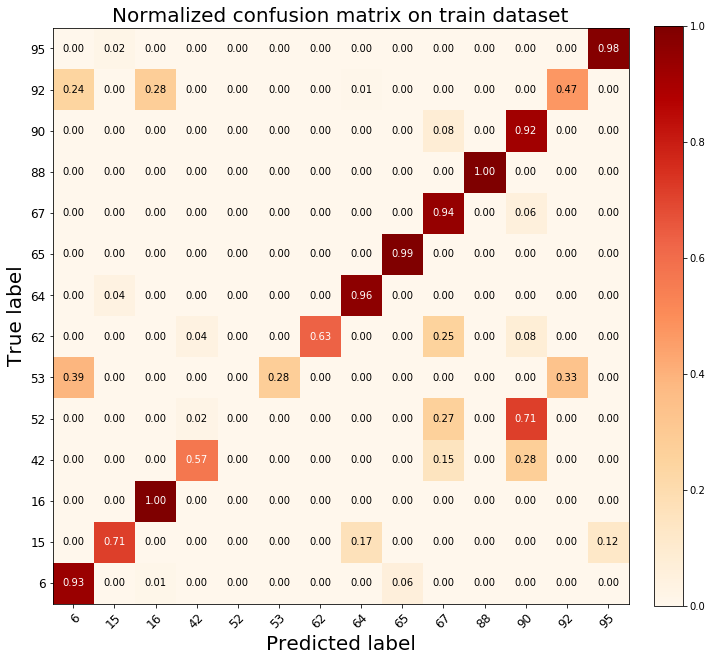

In [0]:
predicts = model.predict(X_train)

Y = []
pr= []

for i in range(len(y_train)):
    
    pr.append(np.argmax((np.array(predicts)[i])))
    Y.append(np.argmax(np.array(y_train)[i]))


    
conf_plotter(Y , pr , labels , normalize=1, cmap = plt.cm.OrRd, save=1 , name='train_3.jpg')